# EvolvePy Example 5 - RamdomPredation

In this example, we will show how to create a generator with ramdom predation, to improve the populations capacity do adapt by eliminationg the n weakest individuals. 

- Defining a generator with complex sequence
- Use ramdom predation

In [7]:
try:
    import evolvepy
except:
    import sys
    sys.path.append("..\src")
import evolvepy

import numpy as np
from matplotlib import pyplot as plt

# Fitness functions

We will use the same function as the first example (see Simple EA example).

In [8]:
from evolvepy.evaluator import FunctionEvaluator

def fitness_function(individuals):
    individual = individuals[0]["chr0"][0] 

    score = 0

    if individual < 500:
        score = individual
    elif individual < 1000:
        score = 1000 - individual
    elif individual < 2000:
        score = individual - 1000
    else:
        score = 3000 - individual

    return score

evaluator = FunctionEvaluator(fitness_function)

# Create the generator

Unlike the previous example, let's define the sequence of operators to generate the population with a bifurcation. The first path will generate the new individuals using crossover and mutation as before, however the second will only select the worst 5 individuals and exchange them with a ramdomly better individual.

Vamos utilizar camadas de filtro para nos certificarmos que apenas a quantidade desejada de indivíduos é passada em frente, evitando aumentar a população.

In [10]:
from evolvepy.generator.generator import Generator
from evolvepy.generator.layer import Concatenate, Layer
from evolvepy.generator.combine import CombineLayer
from evolvepy.generator.basic_layers import Sort,FilterFirsts, RamdomPredate
from evolvepy.generator.mutation import NumericMutationLayer, sum_mutation
from evolvepy.generator.crossover import one_point
from evolvepy.generator.selection import tournament

# Defines the layers of the generator
first_layer = Layer() # Input layer 

# First path: Combine -> Mutation -> Filter
combine = CombineLayer(tournament, one_point)
mutation = NumericMutationLayer(sum_mutation, 1.0, 0.0, (-10.0, 10.0))
filter1 = FilterFirsts(95)
first_layer.next = combine
combine.next = mutation
mutation.next = filter1

# Second path: Sort -> Filter
sort = Sort()
filter2 = RamdomPredate(5)
first_layer.next = sort
sort.next = filter2

# Combine both paths
concatenate = Concatenate()
filter1.next = concatenate
filter2.next = concatenate

# Creates the generator, specifying that an individual has only one chromosome, which can vary between -1000 and 4000 
generator = Generator(1, chromossome_ranges=(-1000.0, 4000.0), first_layer=first_layer, last_layer=concatenate)

ImportError: cannot import name 'Concatenate' from 'evolvepy.generator.layer' (/home/j/.local/lib/python3.7/site-packages/evolvepy/generator/layer.py)

# Evaluate

Let's define the evolver and evolve for a few generations.

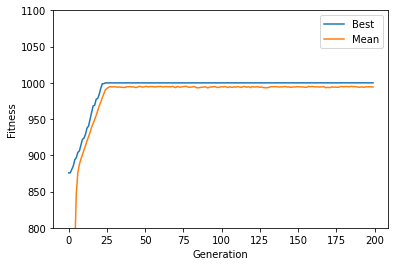

In [ ]:
from evolvepy import Evolver

evolver = Evolver(generator, evaluator, 100)

# Optmizes over 200 generations
hist, last_population = evolver.evolve(200) 

# Plot the results
plt.plot(hist.min(axis=1))
plt.plot(hist.mean(axis=1))

plt.legend(["Worst", "Mean"])
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.ylim(800,1100)
plt.savefig("Example5-Figure1.jpg")

See how now the best fitness never gets worse? This is the effect of the Elitism! With it, you will never lose the best individual and the solution can only get better as the generations go by.

![Figure1](Example5-Figure1.jpg)